In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e26/sample_submission.csv
/kaggle/input/playground-series-s3e26/train.csv
/kaggle/input/playground-series-s3e26/test.csv
/kaggle/input/cirrhosis-project/cirrtest.csv
/kaggle/input/cirrhosis-project/cirrsample_submission.csv
/kaggle/input/cirrhosis-project/cirrtrain.csv


In [ ]:
#data processing
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pylab as plt
import seaborn as sns

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler

#importing clustering algorithms (unsupervised learning)
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture



from sklearn.metrics import silhouette_score

#Linear Regression models
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supervised Learning libraries (categorical)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve)

import warnings
warnings.filterwarnings("ignore")

# Loading the Data

In [ ]:
train=pd.read_csv('/kaggle/input/cirrhosis-project/cirrtrain.csv')

In [ ]:
test=pd.read_csv('/kaggle/input/cirrhosis-project/cirrtest.csv')

# Evaluate the Data


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [ ]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [ ]:
test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


In [ ]:
train.shape

(7905, 20)

In [ ]:
test.shape

(5271, 19)

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,7905.0,3952.000000,2282.121272,0.00,1976.00,3952.00,5928.00,7904.00
N_Days,7905.0,2030.173308,1094.233744,41.00,1230.00,1831.00,2689.00,4795.00
Age,7905.0,18373.146490,3679.958739,9598.00,15574.00,18713.00,20684.00,28650.00
Bilirubin,7905.0,2.594485,3.812960,0.30,0.70,1.10,3.00,28.00
Cholesterol,7905.0,350.561923,195.379344,120.00,248.00,298.00,390.00,1775.00
Albumin,7905.0,3.548323,0.346171,1.96,3.35,3.58,3.77,4.64
Copper,7905.0,83.902846,75.899266,4.00,39.00,63.00,102.00,588.00
Alk_Phos,7905.0,1816.745250,1903.750657,289.00,834.00,1181.00,1857.00,13862.40
SGOT,7905.0,114.604602,48.790945,26.35,75.95,108.50,137.95,457.25
Tryglicerides,7905.0,115.340164,52.530402,33.00,84.00,104.00,139.00,598.00


**Looking at the data, we can make some immediate observations:**

* Age looks to have a fairly normal distribution
* Bilirubin is highly skewed and has a large range
* Albumin has a relatively tight distribution of data
* Copper also has a skew to the data with an enormous range
* Both SGoT and Triglycerides appear to possibly have some outliers

In [ ]:
train.isnull().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [ ]:
test.isnull().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

**The data set is complete with no missing values**

In [ ]:
train.nunique()

id               7905
N_Days            461
Drug                2
Age               391
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         111
Cholesterol       226
Albumin           160
Copper            171
Alk_Phos          364
SGOT              206
Tryglicerides     154
Platelets         227
Prothrombin        49
Stage               4
Status              3
dtype: int64

In [ ]:
test.nunique()

id               5271
N_Days            409
Drug                2
Age               363
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         108
Cholesterol       222
Albumin           154
Copper            164
Alk_Phos          362
SGOT              195
Tryglicerides     155
Platelets         223
Prothrombin        47
Stage               4
dtype: int64

**the "id" column is simply a patient identifier, and can be dropped from the datasets**

**Checking the categorical columns**

In [ ]:
#getting information from all categorical variables

# List of all important categorical variables
cat_col = ['Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema','Status']
           # Printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(train[column].value_counts(1))
    print("-" * 50)

Drug
Placebo            0.507274
D-penicillamine    0.492726
Name: proportion, dtype: float64
--------------------------------------------------
Sex
F    0.92802
M    0.07198
Name: proportion, dtype: float64
--------------------------------------------------
Ascites
N    0.951929
Y    0.048071
Name: proportion, dtype: float64
--------------------------------------------------
Hepatomegaly
Y    0.511322
N    0.488678
Name: proportion, dtype: float64
--------------------------------------------------
Spiders
N    0.754712
Y    0.245288
Name: proportion, dtype: float64
--------------------------------------------------
Edema
N    0.905882
S    0.050474
Y    0.043643
Name: proportion, dtype: float64
--------------------------------------------------
Status
C     0.628083
D     0.337128
CL    0.034788
Name: proportion, dtype: float64
--------------------------------------------------


In [ ]:
#getting information from all categorical variables

# List of all important categorical variables
cat_col = ['Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema']
           # Printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(test[column].value_counts(1))
    print("-" * 50)

Drug
Placebo            0.511098
D-penicillamine    0.488902
Name: proportion, dtype: float64
--------------------------------------------------
Sex
F    0.925251
M    0.074749
Name: proportion, dtype: float64
--------------------------------------------------
Ascites
N    0.953709
Y    0.046291
Name: proportion, dtype: float64
--------------------------------------------------
Hepatomegaly
Y    0.517928
N    0.482072
Name: proportion, dtype: float64
--------------------------------------------------
Spiders
N    0.753557
Y    0.246443
Name: proportion, dtype: float64
--------------------------------------------------
Edema
N    0.907987
S    0.049706
Y    0.042307
Name: proportion, dtype: float64
--------------------------------------------------


**Categorical columns do not seem to contain any typos or data errors**

# Data Visualization

In [ ]:
#histogram-boxplot combo
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid = 2
        sharex=True,  # X-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

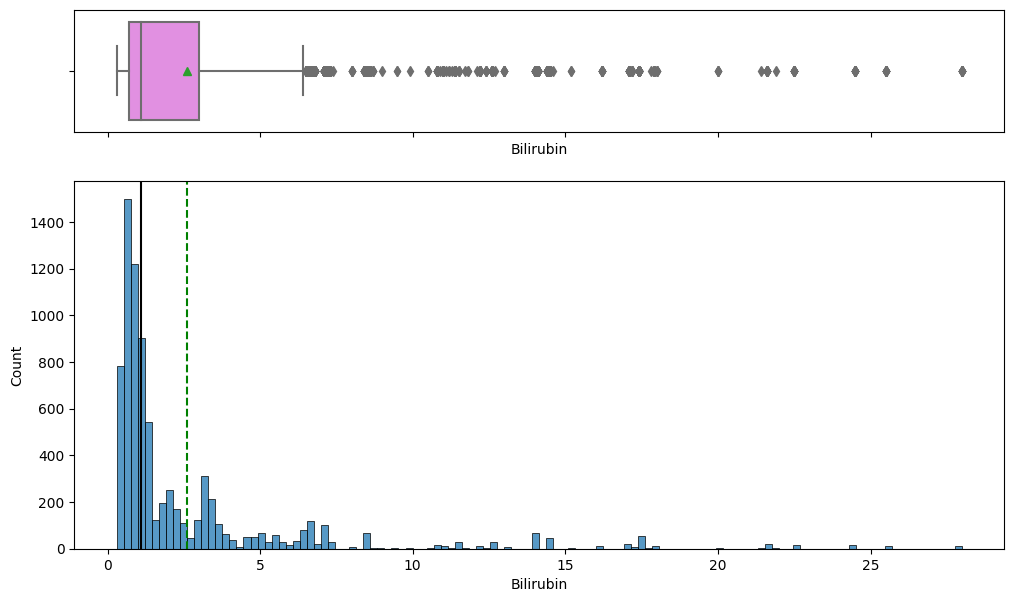

In [ ]:
histogram_boxplot(train, "Bilirubin", figsize=(12, 7), kde=False, bins=None)

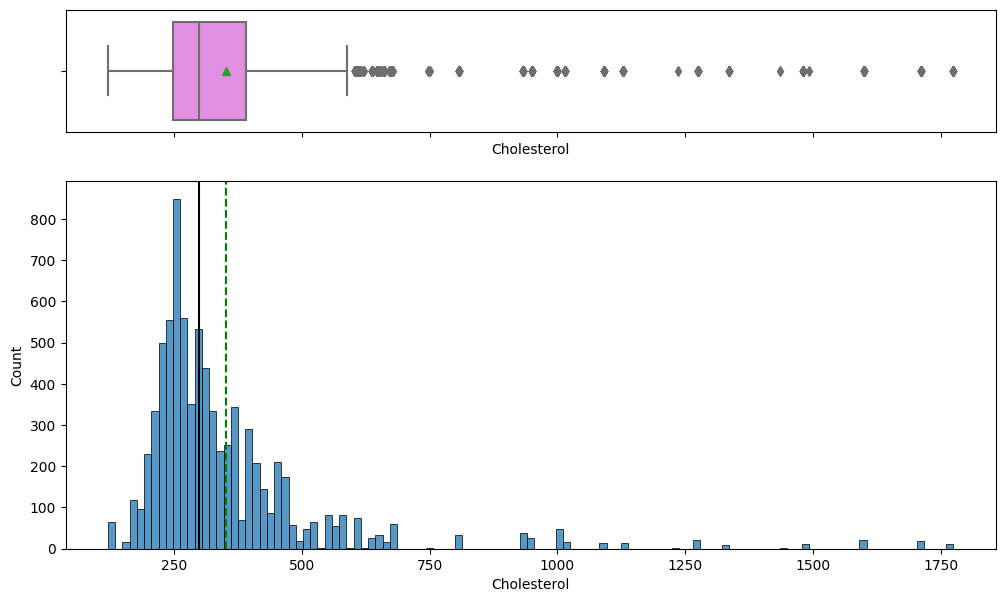

In [ ]:
histogram_boxplot(train, "Cholesterol", figsize=(12, 7), kde=False, bins=None)

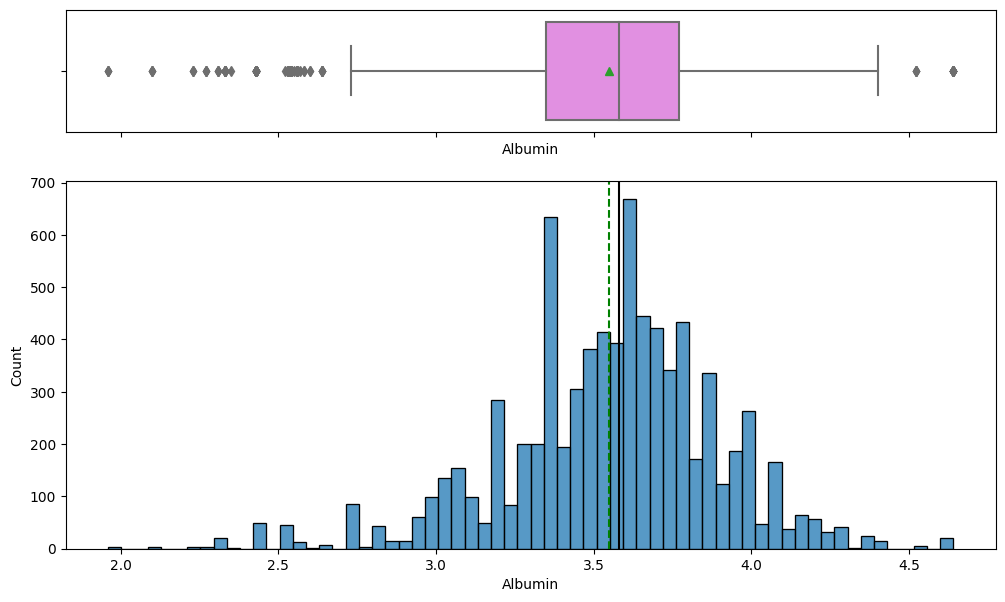

In [ ]:
histogram_boxplot(train, "Albumin", figsize=(12, 7), kde=False, bins=None)

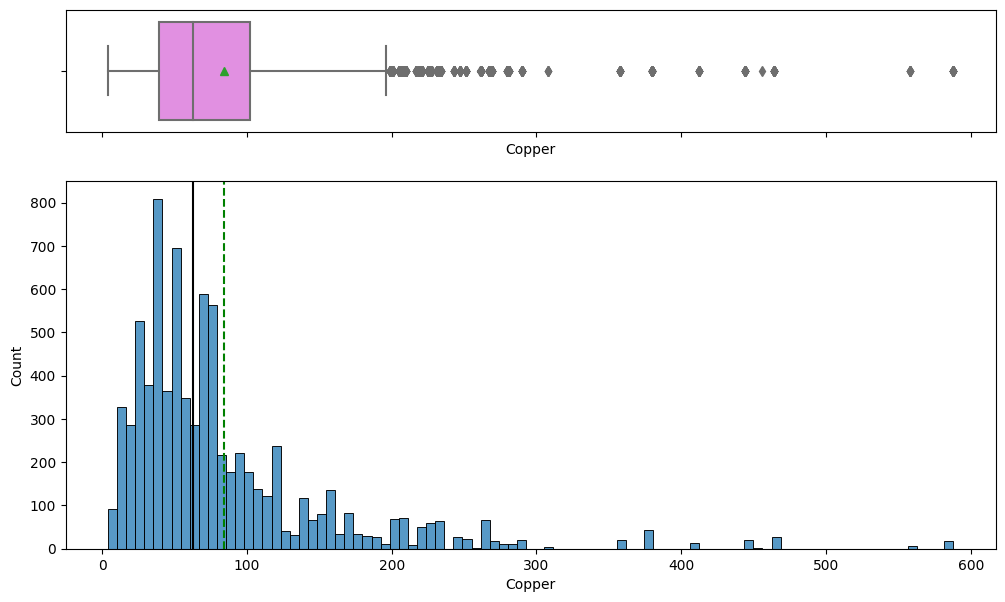

In [ ]:
histogram_boxplot(train, "Copper", figsize=(12, 7), kde=False, bins=None)

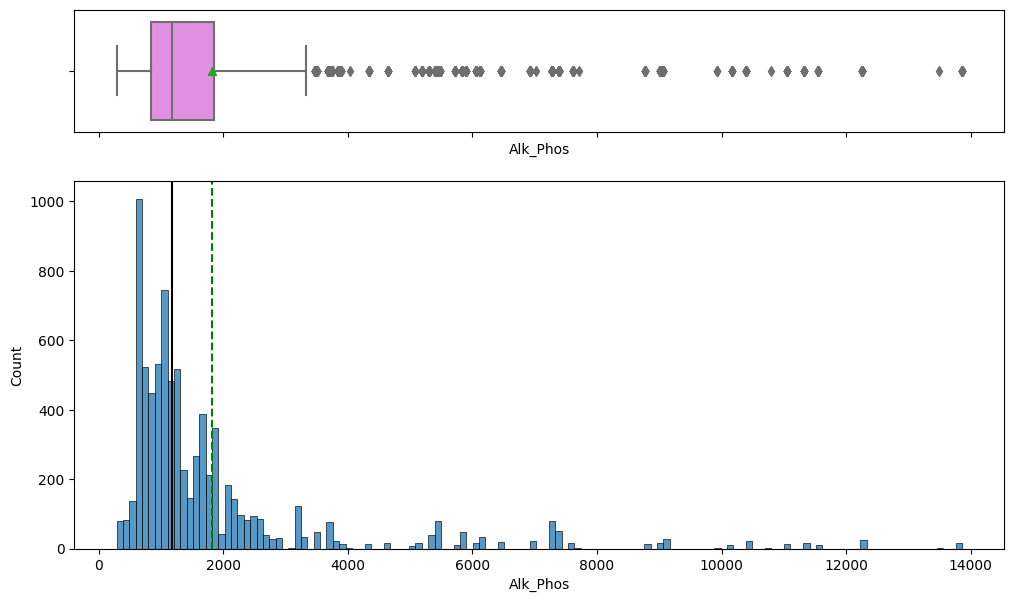

In [ ]:
histogram_boxplot(train, "Alk_Phos", figsize=(12, 7), kde=False, bins=None)

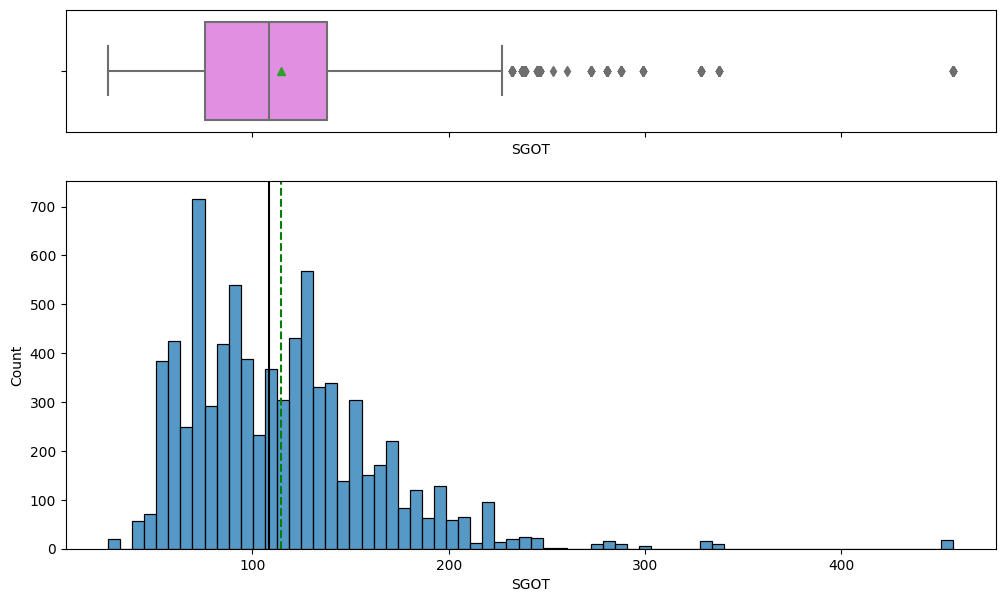

In [ ]:
histogram_boxplot(train, "SGOT", figsize=(12, 7), kde=False, bins=None)

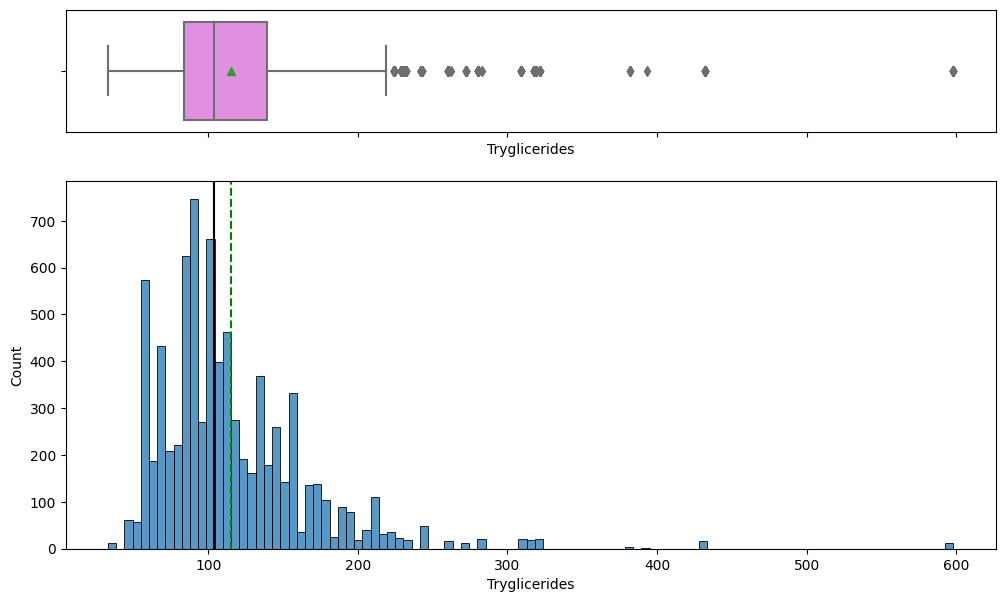

In [ ]:
histogram_boxplot(train, "Tryglicerides", figsize=(12, 7), kde=False, bins=None)

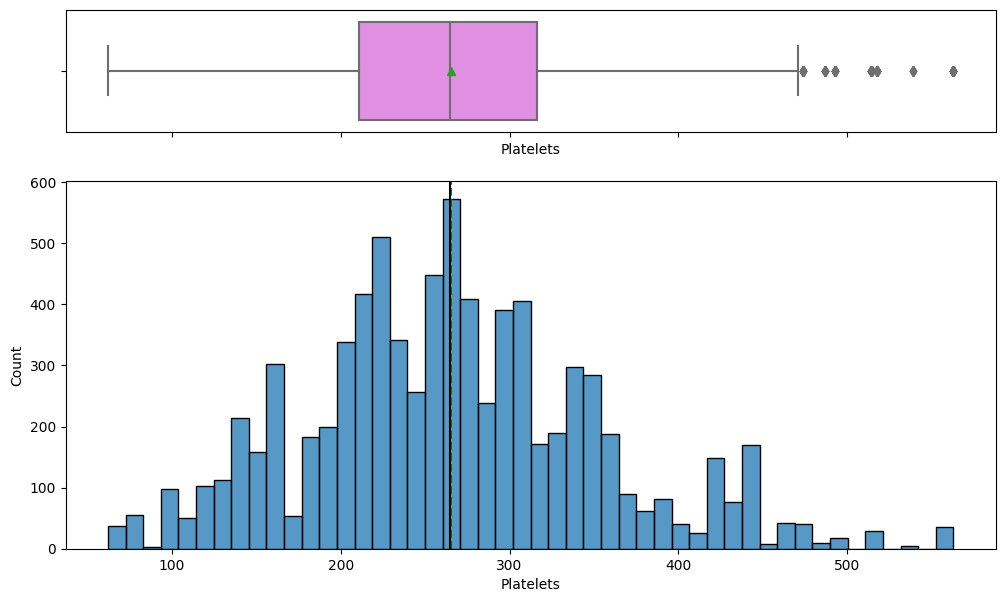

In [ ]:
histogram_boxplot(train, "Platelets", figsize=(12, 7), kde=False, bins=None)

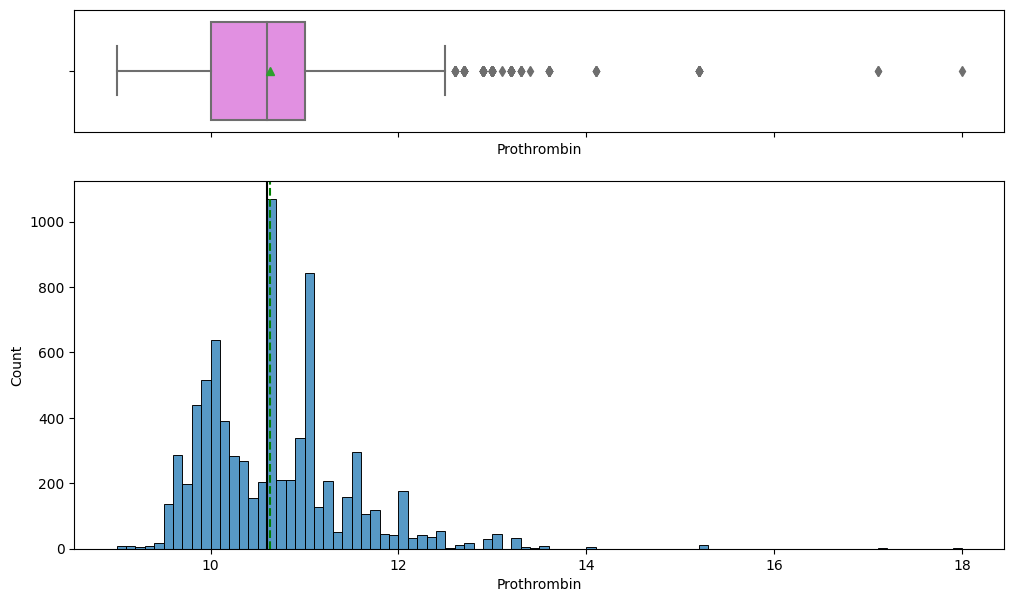

In [ ]:
histogram_boxplot(train, "Prothrombin", figsize=(12, 7), kde=False, bins=None)

**Much of that data shows a significant right skewed distribution, which is commonly associated with high levels of biomarkers.  While these are indicated as outliers, they will not be treated as they represent a real segment of the population which should be accounted for within the model**

**Evaluating the Categorical Variables**

In [ ]:
#Creating a stacked barplot
# Function to plot stacked bar plots

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins = True).sort_values(
        by = sorter, ascending = False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize = "index").sort_values(
        by = sorter, ascending = False
    )
    tab.plot(kind = "bar", stacked = True, figsize = (count + 1, 5))
    plt.legend(
        loc = "lower left",
        frameon = False,
    )
    plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))
    plt.show()

Status              C   CL     D   All
Drug                                  
All              4965  275  2665  7905
D-penicillamine  2405  151  1339  3895
Placebo          2560  124  1326  4010
------------------------------------------------------------------------------------------------------------------------


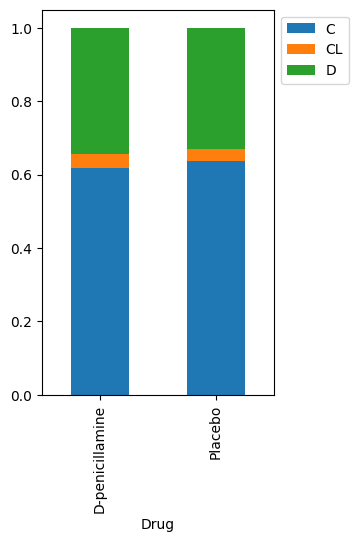

In [ ]:
stacked_barplot(train, "Drug", "Status")

Status     C   CL     D   All
Sex                          
All     4965  275  2665  7905
F       4735  251  2350  7336
M        230   24   315   569
------------------------------------------------------------------------------------------------------------------------


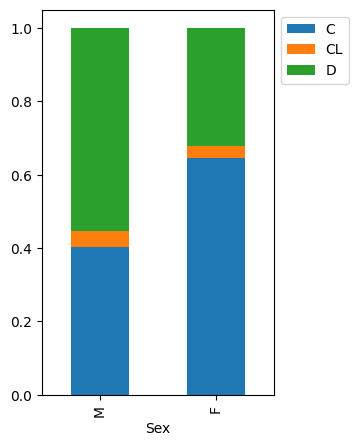

In [ ]:
stacked_barplot(train, "Sex", "Status")

Status      C   CL     D   All
Ascites                       
All      4965  275  2665  7905
N        4940  269  2316  7525
Y          25    6   349   380
------------------------------------------------------------------------------------------------------------------------


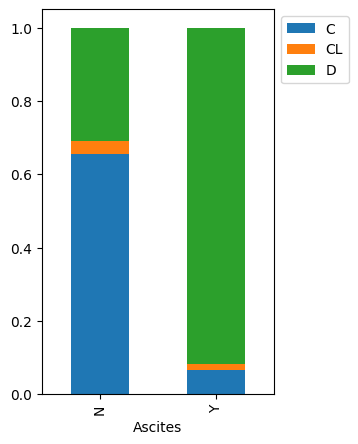

In [ ]:
stacked_barplot(train, "Ascites", "Status")

Status           C   CL     D   All
Hepatomegaly                       
All           4965  275  2665  7905
Y             1791  166  2085  4042
N             3174  109   580  3863
------------------------------------------------------------------------------------------------------------------------


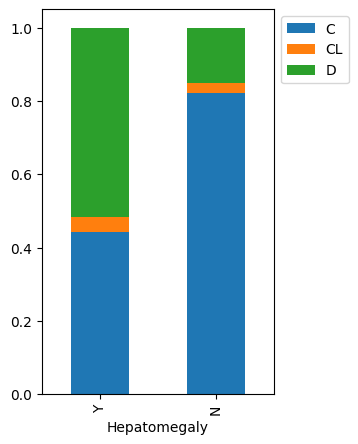

In [ ]:
stacked_barplot(train, "Hepatomegaly", "Status")

Status      C   CL     D   All
Spiders                       
All      4965  275  2665  7905
N        4272  193  1501  5966
Y         693   82  1164  1939
------------------------------------------------------------------------------------------------------------------------


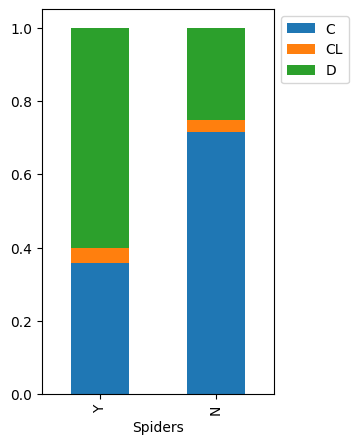

In [ ]:
stacked_barplot(train, "Spiders", "Status")

Status     C   CL     D   All
Edema                        
All     4965  275  2665  7905
N       4847  257  2057  7161
S        110   16   273   399
Y          8    2   335   345
------------------------------------------------------------------------------------------------------------------------


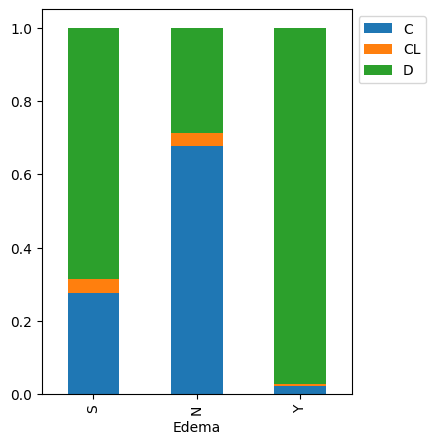

In [ ]:
stacked_barplot(train, "Edema", "Status")

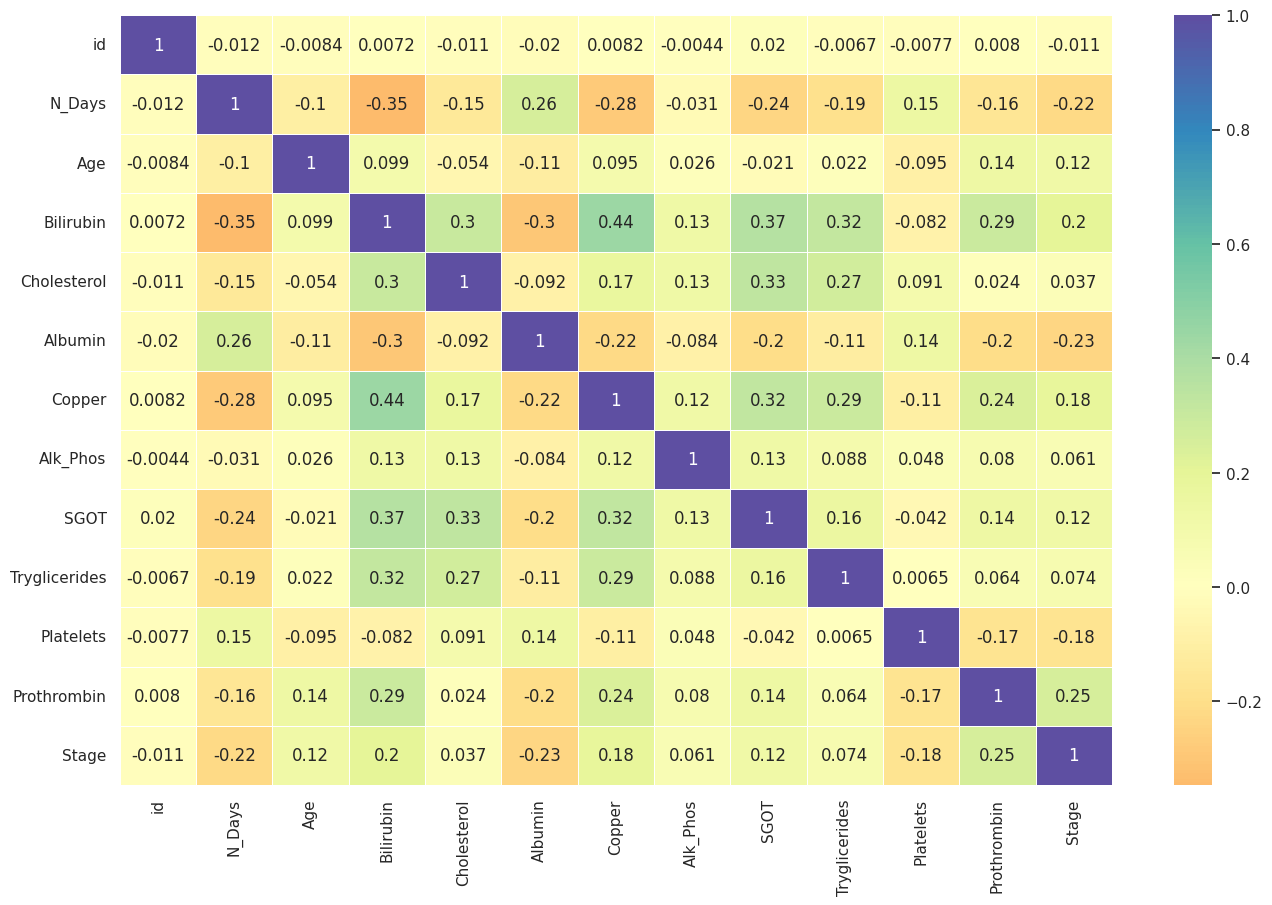

In [ ]:
# Correlation matrix

sns.set(rc={"figure.figsize": (16, 10)})
sns.heatmap(
    train.corr(numeric_only=True), annot=True, linewidths=0.5, center=0, cbar=True, cmap="Spectral"
)
plt.show()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [ ]:
train_df=train.copy()

In [ ]:
test_df=test.copy()

In [ ]:
train_df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

**Data Preparation for Model Building**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
# Creating list of dummy columns
columns=['Sex','Ascites','Hepatomegaly','Spiders','Edema','Drug']
le=LabelEncoder()
train['Status']=le.fit_transform(train['Status'])
for i in columns:
    train[i]=le.fit_transform(train[i])
    test[i]=le.transform(test[i])




In [ ]:
sc=StandardScaler()
columns_to_scale=['Age','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin','Stage']
train[columns_to_scale]=sc.fit_transform(train[columns_to_scale])
test[columns_to_scale]=sc.transform(test[columns_to_scale])

In [ ]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,0,0.858448,1,0,0,0,0,2.3,-0.176908,-0.572940,1.160785,-0.113334,1.336304,-0.996442,1.472341,-1.189049,-0.037522,2
1,1,2574,1,0.234760,0,0,0,0,0,0.9,0.068784,-0.024043,-0.275420,-0.197909,0.414968,-0.520497,1.095026,0.474024,-0.037522,0
2,2,3428,1,-1.262634,0,0,1,1,2,3.3,-0.263923,0.004846,0.620561,-0.413812,0.097266,-1.243933,-0.757248,1.369525,1.116605,2
3,3,2576,1,0.023603,0,0,0,0,0,0.6,-0.484022,-0.139601,-0.341301,-0.086017,-0.887610,-0.368194,0.043117,0.090238,-0.037522,0
4,4,788,1,-0.466107,0,0,1,0,0,1.1,-0.023351,0.293739,-0.275420,-0.333965,0.224347,-0.368194,0.374697,-0.037691,1.116605,0


In [ ]:
## Separating Independent and Dependent Columns
X = train.drop(['Status'],axis=1)
Y = train[['Status']]

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training and Testing set.

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42,stratify = Y)

**Neural Network Model 1**

In [ ]:
# For Model Building
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential, Model # Sequential API for sequential model
from tensorflow.keras.layers import Dense, Dropout, Flatten # Importing different layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU, Activation
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical # To perform one-hot encoding
from tensorflow.keras.optimizers import RMSprop, Adam, SGD # Optimizers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  # Regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import losses, optimizers

In [ ]:
#Clear the model from memory

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Crete a Sequential Object
model = Sequential()

# Add first layer with 100 neurons to the sequental object
model.add(Dense(100, input_shape = (19, ), activation = 'relu'))

# Add second layer with 100 neurons to the sequental object
model.add(Dense(100, activation = 'relu'))

# Add third layer with 100 neurons to the sequental object
model.add(Dense(100, activation = 'relu'))

# Output layer with 10 neurons as it has 10 classes
model.add(Dense(3, activation = 'softmax'))

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = 'adam')

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         2,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,503 (87.90 KB)

 Trainable params: 22,503 (87.90 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X_train.shape

(6324, 19)

In [ ]:
# The following lines of code saves the best model's parameters if training accuracy goes down on further training
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('best_model.keras', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True) # Changed the file extension to .keras

# Fitting the model with 50 epochs and validation_split as 20%
history=model.fit(X_train,
          y_train,
          epochs = 50,
          batch_size= 32, validation_split = 0.20, callbacks = [es, mc])

Epoch 1/50
148/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5659 - loss: 36.5017
Epoch 1: val_accuracy improved from -inf to 0.69565, saving model to best_model.keras
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5671 - loss: 34.8660 - val_accuracy: 0.6957 - val_loss: 6.8764
Epoch 2/50
152/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5905 - loss: 6.1508
Epoch 2: val_accuracy did not improve from 0.69565
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5908 - loss: 6.1404 - val_accuracy: 0.6648 - val_loss: 4.0645
Epoch 3/50
152/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6165 - loss: 3.1999
Epoch 3: val_accuracy did not improve from 0.69565
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6170 - loss: 3.2065 - val_accuracy: 0.5826 - val_loss: 4.9153
Epoch 4/50
149/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6228 - loss: 2.9670
Epoch 4: val_accuracy did not improve from 0.69565
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6241 - lo

In [ ]:
class_names_list = ['C', 'CL', 'D']
def metrics_score(actual, predicted):
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=class_names_list, yticklabels=class_names_list)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.72      0.97      0.83       993
           1       0.09      0.13      0.10        55
           2       0.91      0.26      0.41       533

    accuracy                           0.71      1581
   macro avg       0.57      0.46      0.45      1581
weighted avg       0.76      0.71      0.66      1581



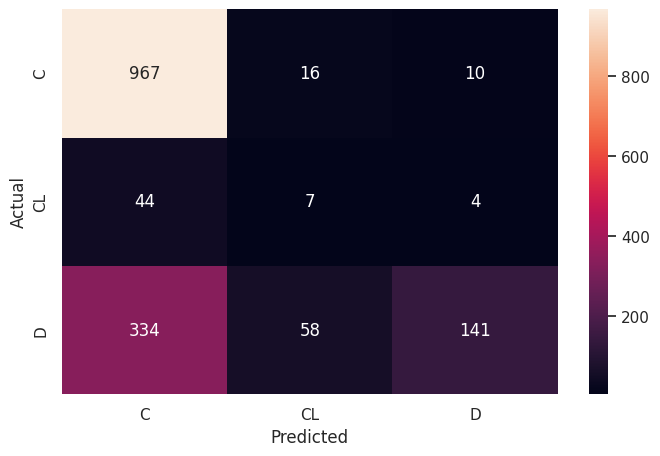

In [ ]:
test_pred1 = np.argmax(model.predict(X_test), axis=-1)

metrics_score(y_test, test_pred1)

**Neural Network Model 2**

In [ ]:
#Clear the model from memory

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Crete a Sequential Object
model2 = Sequential()

# Add first layer with 100 neurons to the sequental object
model2.add(Dense(100, input_shape = (19, ), activation = 'relu'))


model2.add(Dense(100, activation = 'relu'))
model2.add(Dense(200, activation = 'relu'))
model2.add(Dense(100, activation = 'relu'))

model2.add(Dense(3, activation = 'softmax'))

model2.compile(loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = 'adam')

In [ ]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         2,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,703 (205.87 KB)

 Trainable params: 52,703 (205.87 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# The following lines of code saves the best model's parameters if training accuracy goes down on further training
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('best_model.keras', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True) # Changed the file extension to .keras

# Fitting the model with 50 epochs and validation_split as 20%
history=model2.fit(X_train,
          y_train,
          epochs = 50,
          batch_size= 32, validation_split = 0.20, callbacks = [es, mc])

Epoch 1/50
138/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5619 - loss: 21.6038
Epoch 1: val_accuracy improved from -inf to 0.60949, saving model to best_model.keras
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5641 - loss: 19.9112 - val_accuracy: 0.6095 - val_loss: 8.0771
Epoch 2/50
156/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5929 - loss: 3.6995
Epoch 2: val_accuracy did not improve from 0.60949
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5932 - loss: 3.6681 - val_accuracy: 0.4656 - val_loss: 2.1475
Epoch 3/50
153/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5930 - loss: 1.6475
Epoch 3: val_accuracy improved from 0.60949 to 0.62372, saving model to best_model.keras
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5943 - loss: 1.6354 - val_accuracy: 0.6237 - val_loss: 1.6354
Epoch 4/50
156/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6186 - loss: 1.4382
Epoch 4: val_accuracy did not improve from 0.62372
159/159 ━━━━━━━━━━━━━━━━━━

In [ ]:
def metrics_score(actual, predicted):
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=class_names_list, yticklabels=class_names_list)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       993
           1       0.00      0.00      0.00        55
           2       0.56      0.72      0.63       533

    accuracy                           0.70      1581
   macro avg       0.46      0.48      0.47      1581
weighted avg       0.70      0.70      0.70      1581



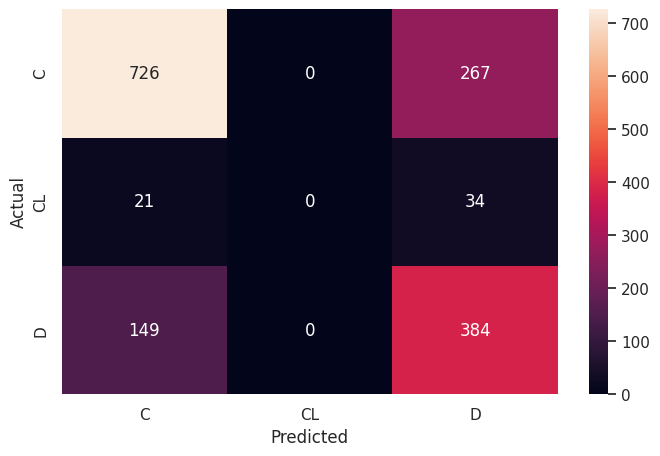

In [ ]:
test_pred2 = np.argmax(model2.predict(X_test), axis=-1)

metrics_score(y_test, test_pred2)

In [ ]:
#Clear the model from memory

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Crete a Sequential Object
model3 = Sequential()

# Add first layer with 100 neurons to the sequental object
model3.add(Dense(200, input_shape = (19, ), activation = 'relu'))


model3.add(Dense(200, activation = 'relu'))
model3.add(BatchNormalization())
model3.add(Dense(100, activation = 'relu'))
model3.add(BatchNormalization())
model3.add(Dense(50, activation = 'relu'))
model3.add(BatchNormalization())
model3.add(Dense(25, activation = 'relu'))
model3.add(Dense(3, activation = 'softmax'))

model3.compile(loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = 'adam')

In [ ]:
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 200)            │         4,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 200)            │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            78 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,103 (281.65 KB)

 Trainable params: 71,403 (278.92 KB)

 Non-trainable params: 700 (2.73 KB)

In [ ]:
# The following lines of code saves the best model's parameters if training accuracy goes down on further training
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('best_model.keras', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True) # Changed the file extension to .keras

# Fitting the model with 50 epochs and validation_split as 20%
history=model3.fit(X_train,
          y_train,
          epochs = 50,
          batch_size= 32, validation_split = 0.20, callbacks = [es, mc])

Epoch 1/50
153/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6885 - loss: 0.7671
Epoch 1: val_accuracy improved from -inf to 0.73913, saving model to best_model.keras
159/159 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6896 - loss: 0.7650 - val_accuracy: 0.7391 - val_loss: 0.6817
Epoch 2/50
153/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7095 - loss: 0.6969
Epoch 2: val_accuracy improved from 0.73913 to 0.74545, saving model to best_model.keras
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7100 - loss: 0.6967 - val_accuracy: 0.7455 - val_loss: 0.6517
Epoch 3/50
152/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7146 - loss: 0.6892
Epoch 3: val_accuracy did not improve from 0.74545
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7151 - loss: 0.6888 - val_accuracy: 0.7336 - val_loss: 0.6552
Epoch 4/50
156/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7113 - loss: 0.6917
Epoch 4: val_accuracy did not improve from 0.74545
159/159 ━━━━━━━━━━━━━━━━━━━━

**Decision Tree Building**

In [ ]:
def metrics_score(actual, predicted):
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=class_names_list, yticklabels=class_names_list)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       993
           1       0.00      0.00      0.00        55
           2       0.56      0.72      0.63       533

    accuracy                           0.70      1581
   macro avg       0.46      0.48      0.47      1581
weighted avg       0.70      0.70      0.70      1581



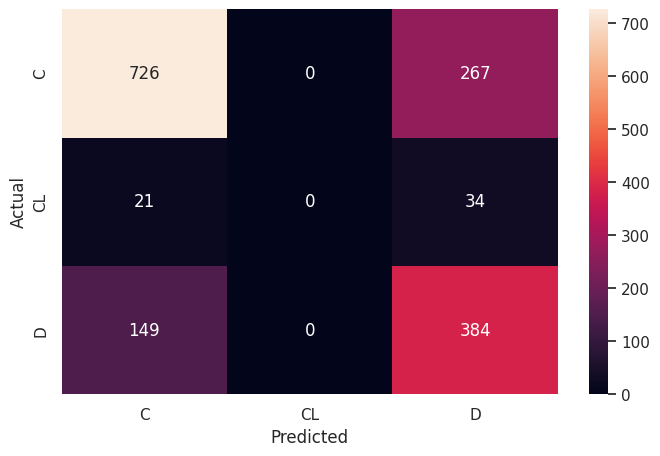

In [ ]:
test_pred3 = np.argmax(model2.predict(X_test), axis=-1)

metrics_score(y_test, test_pred3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    StackingClassifier,
)
from xgboost import XGBClassifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3972
           1       1.00      1.00      1.00       220
           2       1.00      1.00      1.00      2132

    accuracy                           1.00      6324
   macro avg       1.00      1.00      1.00      6324
weighted avg       1.00      1.00      1.00      6324



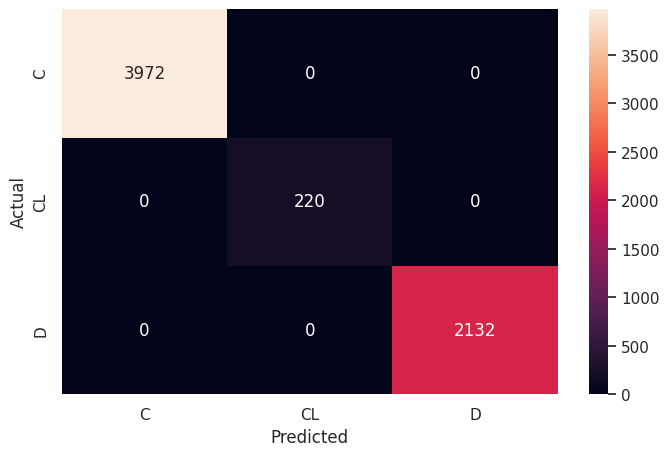

In [ ]:
dt = DecisionTreeClassifier(random_state=1);
dt.fit(X_train, y_train)
y_train_pred_dt = dt.predict(X_train)
metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       993
           1       0.08      0.07      0.08        55
           2       0.67      0.65      0.66       533

    accuracy                           0.73      1581
   macro avg       0.52      0.51      0.51      1581
weighted avg       0.73      0.73      0.73      1581



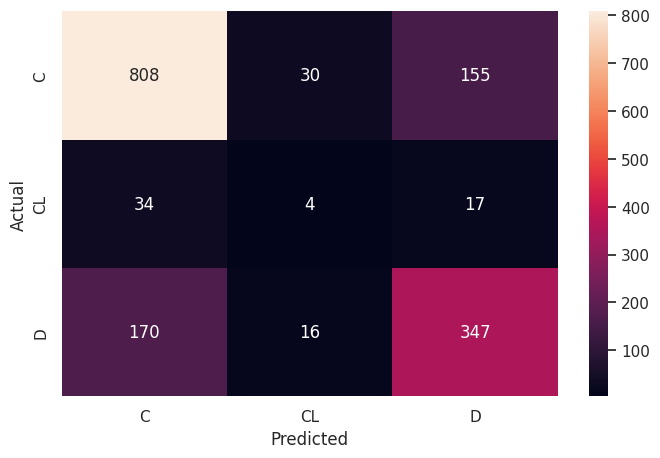

In [ ]:
y_test_pred_dt = dt.predict(X_test);
metrics_score(y_test, y_test_pred_dt)

**Random forest Building**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3972
           1       1.00      1.00      1.00       220
           2       1.00      1.00      1.00      2132

    accuracy                           1.00      6324
   macro avg       1.00      1.00      1.00      6324
weighted avg       1.00      1.00      1.00      6324



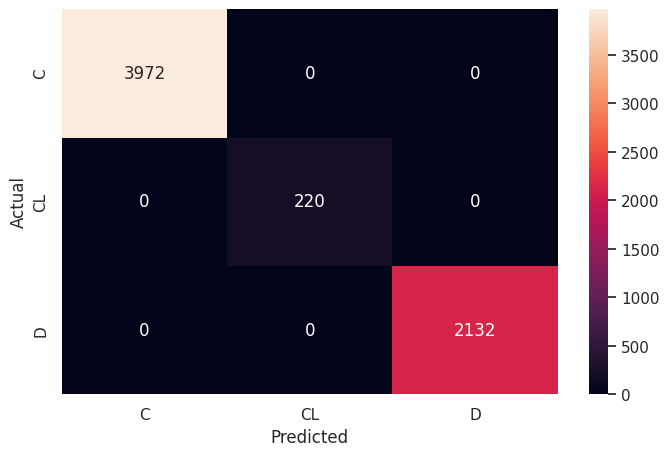

In [ ]:
rf = RandomForestClassifier(random_state=1);
rf.fit(X_train, y_train)
y_train_pred_rf = rf.predict(X_train)
metrics_score(y_train, y_train_pred_rf)

              precision    recall  f1-score   support

           0       0.84      0.91      0.88       993
           1       1.00      0.07      0.14        55
           2       0.79      0.74      0.77       533

    accuracy                           0.83      1581
   macro avg       0.88      0.58      0.59      1581
weighted avg       0.83      0.83      0.81      1581



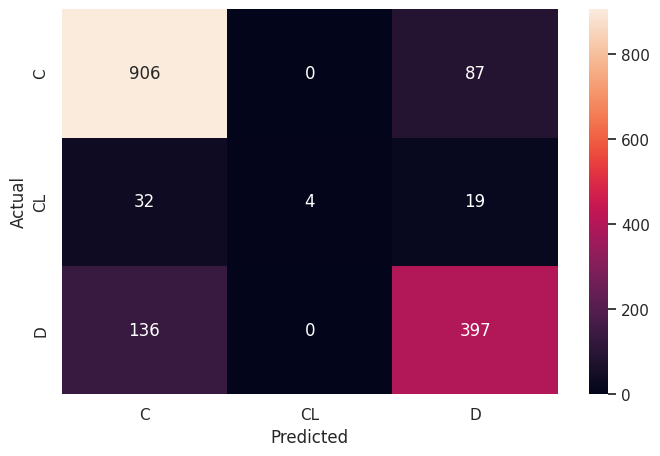

In [ ]:
y_test_pred_rf = rf.predict(X_test);
metrics_score(y_test, y_test_pred_rf)

**XGBoost Classification Model**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3972
           1       1.00      1.00      1.00       220
           2       1.00      0.99      1.00      2132

    accuracy                           1.00      6324
   macro avg       1.00      1.00      1.00      6324
weighted avg       1.00      1.00      1.00      6324



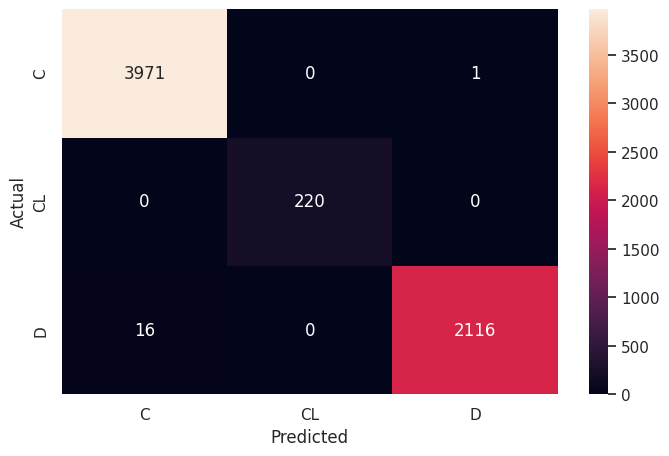

In [ ]:
xg = XGBClassifier(random_state=1);
xg.fit(X_train, y_train)
y_train_pred_xg = xg.predict(X_train)
metrics_score(y_train, y_train_pred_xg)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       993
           1       0.89      0.15      0.25        55
           2       0.78      0.76      0.77       533

    accuracy                           0.82      1581
   macro avg       0.84      0.60      0.63      1581
weighted avg       0.82      0.82      0.81      1581



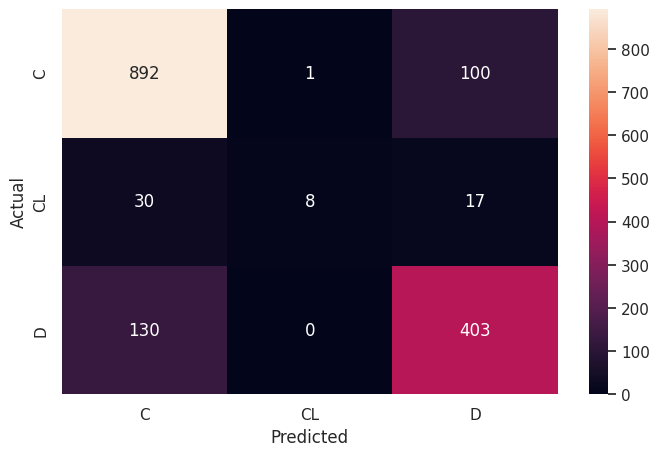

In [ ]:
y_test_pred_xg = xg.predict(X_test);
metrics_score(y_test, y_test_pred_xg)

In [ ]:
accuracy=accuracy_score(y_test, y_test_pred_xg)
print("XGBoost Model Accuracy" , accuracy)

XGBoost Model Accuracy 0.8241619228336496


**The XGBoost model produced an accuracy of ~82% for Cirrhosis classification**

In [ ]:
xg_prob=xg.predict_proba(test)

In [ ]:
submission=pd.DataFrame(xg_prob,columns=['Status_C','Status_D','Status_CL'])
submission['id']=test['id']
submission=submission[['id','Status_C','Status_D','Status_CL']]
submission.to_csv('submission.csv',index=False)
submission

,id,Status_C,Status_D,Status_CL
0,7905,0.391626,0.003151,0.605224
1,7906,0.783622,0.084433,0.131945
2,7907,0.000908,0.000200,0.998892
3,7908,0.990976,0.000198,0.008826
4,7909,0.986628,0.001769,0.011603
...,...,...,...,...
5266,13171,0.905356,0.089628,0.005016
5267,13172,0.996852,0.000136,0.003012
5268,13173,0.966954,0.000258,0.032788
5269,13174,0.999810,0.000029,0.000160
